In [1]:
import os
import sys
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load the data

In [2]:
n_runs = 3 # number of runs that the simulation was repeated
n_turns = int(1e5)            # number of cycles to run the simulation for
decTurns = int(100)           # how often to record data
circumference  = 6911.5623 # [m]
f_rev  = 299792458/circumference  # [Hz] The revolution frequency of the machine 


In [3]:
separationTime = 1 / f_rev * decTurns #There are decTurns revolutions before each recording of data
tspan = (np.arange(n_turns / decTurns) + 1.0) * separationTime #total time spanned by the simulation

In [34]:
my_start = 400.0
my_stop = 1e4
my_step = 800

my_variables = list(np.arange(my_start, my_stop, my_step))
my_variables.insert(0, 0.0)
#my_variables = np.linspace(my_start, my_stop, 20)
print(my_variables)


[0.0, 400.0, 1200.0, 2000.0, 2800.0, 3600.0, 4400.0, 5200.0, 6000.0, 6800.0, 7600.0, 8400.0, 9200.0]


In [35]:
path_to_data = '/afs/cern.ch/work/n/natriant/private/pyheadtail_example_crabcavity/'
study_name ='sps_270GeV_CC_PN1e-8_1e5turns_5e5Nb_wakefieldsON_500slices_ayy' 
noise_type = 'PN'

In [37]:
ex_dict = {} # type: dictionary
ey_dict = {}


for var in my_variables:
    for run in range(n_runs):
        temp_name = f'{var}_run{run}' # the suffix of the name of the current study
        # A. load the turn by turn data in a dictionary
        meanX, meanY, meanXsq, meanYsq, emitX, emitY = np.loadtxt(path_to_data+f'{study_name}{var}_run{run}/file.txt', delimiter = ",", unpack = True)
        # B. Create a different list for each run and save the emittance values
        ex_dict[temp_name] = emitX 
        ey_dict[temp_name] = emitY

### Do the polynomial fit, deg=1

In [38]:
m_dict = {} # slope of the fit
b_dict = {} # offset
err_dict = {} # error of the gradient of the fit slope
for var in my_variables:
    m_dict[f'{var}'], b_dict[f'{var}'], err_dict[f'{var}'] = [], [], []
    for run in range(n_runs):
        temp_name = f'{var}_run{run}'
        # linear fit
        [m, b], cov = np.polyfit(tspan, ey_dict[temp_name], 1, cov=True)
        # compute the error of the gradient of the fit slope
        err= np.sqrt(np.diag(cov))
        m_dict[f'{var}'].append(m) # len(m_dict[f'{var}']) = n_runs
        b_dict[f'{var}'].append(b)
        err_dict[f'{var}'].append(err[0])

In [39]:
data = {}
for var in my_variables:
    data[f'ayy_{var}'] =[m_dict[f'{var}'], b_dict[f'{var}'], err_dict[f'{var}']]
df = pd.DataFrame(data, index=['m','b','err'])

filename = f'deyRates_{study_name}Scan.pkl'
if not os.path.exists(filename):
    df.to_pickle(filename)

In [40]:
df

,ayy_0.0,ayy_400.0,ayy_1200.0,ayy_2000.0,ayy_2800.0,ayy_3600.0,ayy_4400.0,ayy_5200.0,ayy_6000.0,ayy_6800.0,ayy_7600.0,ayy_8400.0,ayy_9200.0
m,"[1.08097754571569e-08, 1.00823914573883e-08, 8...","[1.2010767442866954e-08, 1.2364853952473491e-0...","[1.7737680398607257e-08, 9.813673463125378e-09...","[1.1251873296915003e-08, 1.5354700019465245e-0...","[1.3024405825963914e-08, 1.4313315102012334e-0...","[1.1698346797073129e-08, 1.0903848789178197e-0...","[1.1246583560779581e-08, 1.1012975397371324e-0...","[1.5657394946164117e-08, 1.6890307988116998e-0...","[1.184244149967835e-08, 1.36989769040297e-08, ...","[1.792884976798482e-08, 2.3309049392301403e-08...","[1.8796096356848233e-08, 2.369937137001642e-08...","[2.038078467430324e-08, 1.4964455880130853e-08...","[1.7622216200405047e-08, 1.7455912153224918e-0..."
b,"[2.001062224371366e-06, 2.0002094287793027e-06...","[1.9955547456527707e-06, 2.0029423025350566e-0...","[2.00182929451237e-06, 1.999643739388144e-06, ...","[2.003711425224395e-06, 1.9945867687570973e-06...","[2.001075379676508e-06, 1.9999286920365067e-06...","[2.0011434734131143e-06, 2.0009487979561597e-0...","[2.008034437808436e-06, 2.0005372412675396e-06...","[1.999468400020198e-06, 2.0000555680271295e-06...","[1.9995198279966843e-06, 2.001981264299887e-06...","[1.999267113575896e-06, 1.9932158765143225e-06...","[1.9968253228578274e-06, 1.995488882775908e-06...","[1.9986140530894686e-06, 1.9992643719096373e-0...","[2.000725348084723e-06, 2.0004251113424093e-06..."
err,"[7.58314585007433e-11, 7.035687266110894e-11, ...","[6.919830078490749e-11, 8.751535097360842e-11,...","[9.889191621996998e-11, 5.02937485945374e-11, ...","[9.377321277421609e-11, 4.9891832712647175e-11...","[7.308278992874409e-11, 9.606353717052984e-11,...","[5.5891641481015444e-11, 5.91676271726604e-11,...","[1.340931332798601e-10, 4.705194383779237e-11,...","[6.433221169542356e-11, 7.32174625193646e-11, ...","[8.510342306054616e-11, 5.589067855780267e-11,...","[7.633193517634174e-11, 1.462204954414291e-10,...","[8.66481712560023e-11, 1.6413032237529272e-10,...","[5.253109570004383e-11, 5.7509575504439033e-11...","[5.294158721003003e-11, 6.222665751872331e-11,..."


### Plot emittance growth for one of the variables

No handles with labels found to put in legend.


['ayy_0.0', 'ayy_400.0', 'ayy_1200.0', 'ayy_2000.0', 'ayy_2800.0', 'ayy_3600.0', 'ayy_4400.0', 'ayy_5200.0', 'ayy_6000.0', 'ayy_6800.0', 'ayy_7600.0', 'ayy_8400.0', 'ayy_9200.0']
ayy_9200.0


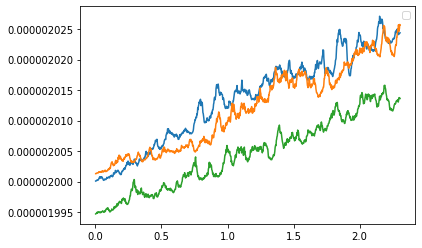

In [54]:
studies_list = list(df.keys())
print(studies_list)
study = studies_list[12] # choose study
print(study)

for run in np.arange(len(df[study]['m'])):
    plt.plot(tspan, ey_dict[f'0.0_run{run}'] )
    #plt.plot(tspan, (df[study]['m'][run]*tspan+df[study]['b'][run])*1e6, label=df[study]['m'][run]*1e9)
# linear fit on the emittance values obtained from the simulation averaged over turns
#plt.plot(time, (m*time+b)*1e6, c = 'k', label='dey/dt={0:.2f}'.format(m*1e9)+'$\pm$'+'{0:.2f} nm/s'.format(err[0]*1e9), linewidth = 2)
plt.legend()

#plt.plot(time, df[])